# PART 1: STATISTICAL FORECAST

## 1.1. Data preparation

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Create demand array
demand = np.array([
    28, 19, 18, 13, 19, 16, 19, 18, 13, 16,
    16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12
])


## 1.2. Forecasting KPIs

In [3]:
def KPI(df):
    print("Forecast KPIs are as below:")

    # Average error
    avg_error = df["Error"].mean()

    # Average demand
    avg_demand = df["Demand"].mean()

    # Bias
    bias = avg_error
    print("Bias value is {:.2f}".format(bias))
    print("Bias% value is {:.2%}".format(bias / avg_demand))

    # MAD - Mean Absolute Deviation
    MAD = (df["Demand"] - avg_demand).abs().mean()
    print("MAD value is {:.2f}".format(MAD))
    print("MAD% value is {:.2%}".format(MAD / avg_demand))

    # MAE - Mean Absolute Error
    MAE = df["Error"].abs().mean()
    print("MAE value is {:.2f}".format(MAE))
    print("MAE% value is {:.2%}".format(MAE / avg_demand))

    # MAPE - Mean Absolute Percentage Error
    MAPE = (df["Error"] / df["Demand"]).abs().mean()
    print("MAPE value is {:.2%}".format(MAPE))

    # MSE - Mean Square Error
    MSE = (df["Error"] ** 2).mean()
    print("MSE value is {:.2f}".format(MSE))

    # RMSE - Root Mean Square Error
    RMSE = MSE ** (1 / 2)
    print("RMSE value is {:.2f}".format(RMSE))
    print("RMSE% value is {:.2%}".format(RMSE / avg_demand))


## 1.3. Moving Average

In [4]:
def moving_average(demand, fcst_period=1, avg_period=3):
    # Create the forecast array
    forecast = np.full(len(demand), np.NaN)

    # Update the demand array
    demand = np.append(demand, fcst_period * np.NaN)

    # Update the forecast array
    forecast = np.append(forecast, fcst_period * np.NaN)

    # Forecast
    for i in range(avg_period, len(demand)):
        forecast[i] = np.mean(demand[i - avg_period:i])

    # Return the result dataframe
    df = pd.DataFrame({'Demand': demand, 'Forecast': forecast, 'Error': demand - forecast})
    return df


In [5]:
# KPIs of the forecasting technique
df = moving_average(demand, fcst_period=1, avg_period=3)
KPI(df)


Forecast KPIs are as below:
Bias value is -0.94
Bias% value is -6.08%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.06
MAE% value is 13.24%
MAPE value is 15.35%
MSE value is 8.86
RMSE value is 2.98
RMSE% value is 19.17%


Text(0, 0.5, 'Value')

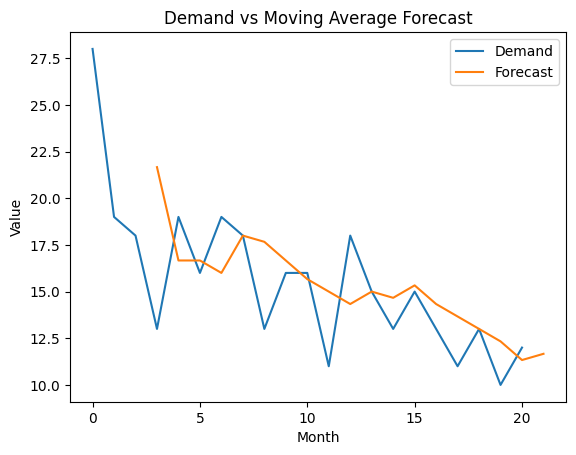

In [6]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Moving Average Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.4. Simple Exponential Smoothing

In [7]:
def simple_exponential_smoothing(demand, fcst_period=1, alpha=0.4):
    # Create forecast array
    forecast = np.full(len(demand), np.NaN)

    # Update demand and forecast array
    demand = np.append(demand, fcst_period * np.NaN)
    forecast = np.append(forecast, fcst_period * np.NaN)

    # Initiate the first forecast
    forecast[0] = demand[0]

    # Forecast the rest
    for i in range(1, len(forecast)):
        forecast[i] = alpha * demand[i - 1] + (1 - alpha) * forecast[i - 1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast': forecast, 'Error': demand - forecast})
    return df


In [8]:
# KPIs of the forecasting technique
df = simple_exponential_smoothing(demand, fcst_period=1, alpha=0.4)
KPI(df)


Forecast KPIs are as below:
Bias value is -1.92
Bias% value is -12.40%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.61
MAE% value is 16.81%
MAPE value is 18.33%
MSE value is 14.41
RMSE value is 3.80
RMSE% value is 24.45%


Text(0, 0.5, 'Value')

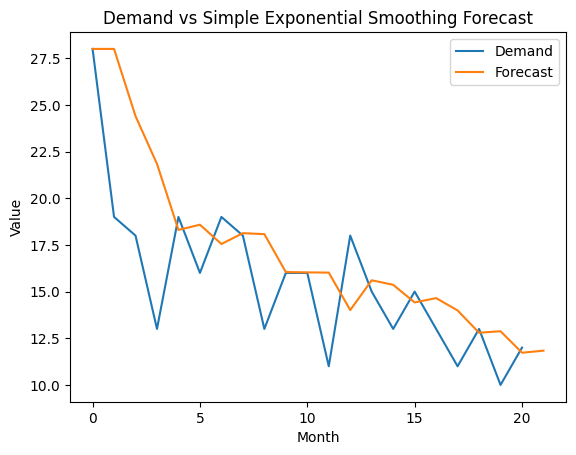

In [9]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Simple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.5. Double Exponential Smoothing

In [10]:
def double_exponential_smoothing(demand, fcst_period=1, alpha=0.4, beta=0.4):
    # Create forecast, level, and trend arrays
    forecast = np.full(len(demand), np.NaN)
    level = np.full(len(demand), np.NaN)
    trend = np.full(len(demand), np.NaN)

    # Update demand, forecast, level, and trend arrays
    demand = np.append(demand, fcst_period * np.NaN)
    forecast = np.append(forecast, fcst_period * np.NaN)
    level = np.append(level, fcst_period * np.NaN)
    trend = np.append(trend, fcst_period * np.NaN)

    # Initiate the first forecast
    level[0] = demand[0]
    trend[0] = demand[1] - demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    # Forecast the rest
    for i in range(2, len(forecast)):
        level[i - 1] = alpha * demand[i - 1] + (1 - alpha) * (level[i - 2] + trend[i - 2])
        trend[i - 1] = beta * (level[i - 1] - level[i - 2]) + (1 - beta) * trend[i - 2]
        forecast[i] = level[i - 1] + trend[i - 1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast': forecast, 'Error': demand - forecast})
    return df


In [11]:
# KPIs of the forecasting technique
df = double_exponential_smoothing(demand, fcst_period=1, alpha=0.4, beta=0.4)
KPI(df)


Forecast KPIs are as below:
Bias value is 2.51
Bias% value is 16.19%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 4.17
MAE% value is 26.88%
MAPE value is 26.80%
MSE value is 37.33
RMSE value is 6.11
RMSE% value is 39.36%


Text(0, 0.5, 'Value')

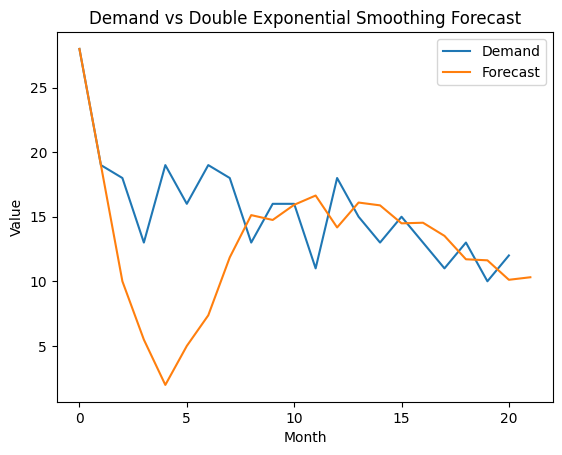

In [12]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Double Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.6.  Model Optimization (Simple and Double Exponential Smoothing examples)

In [13]:
def exponential_smoothing_optimization(demand, fcst_period=6):
    params = []  # alphas and betas
    KPIs = []  # result of KPIs
    dfs = []  # result dataframes

    # Loop alpha options
    for alpha in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
        df = simple_exponential_smoothing(demand, fcst_period, alpha)
        params.append(f'Simple Smoothing, alpha: {alpha}')
        dfs.append(df)
        MAE = df['Error'].abs().mean()
        KPIs.append(MAE)

        # Loop beta options
        for beta in [0.05, 0.1, 0.2, 0.3, 0.4]:
            df = double_exponential_smoothing(demand, fcst_period, alpha, beta)
            params.append(f'Double Smoothing, alpha: {alpha}, beta: {beta}')
            dfs.append(df)
            MAE = df['Error'].abs().mean()
            KPIs.append(MAE)

    # Choosing the dataframe with the best KPI
    mini = np.argmin(KPIs)
    print(f'Best solution found for {params[mini]} MAE of', round(KPIs[mini], 2))
    print(KPIs)

    return dfs[mini]


In [14]:
# Optimization result
df = exponential_smoothing_optimization(demand)

Best solution found for Simple Smoothing, alpha: 0.4 MAE of 2.61
[8.368663579891686, 54.364633521790005, 50.39677315982466, 43.16968719109362, 36.81189694070955, 31.238993500417077, 5.9754740786999365, 39.81832747831705, 34.476528643639945, 25.622385545849152, 18.9601446127948, 16.13306415542628, 3.756661785044236, 24.158829141793596, 18.90870147130008, 11.960194462564385, 9.684175102674098, 8.549507142477461, 2.874592978920482, 16.724211021133613, 12.383662430596596, 7.633579549860413, 6.1949356750707825, 5.405890888939897, 2.609861658102383, 12.66362755456908, 9.1222823951511, 5.680288852213918, 4.7007821197684265, 4.172167318564403, 2.6561521802629744, 10.167809810776223, 7.221664626652124, 4.745887228963493, 4.0685890550257335, 3.7050967925124265, 2.7263277380790627, 8.492114509870012, 5.984085328716431, 4.155044494489834, 3.752311752126024, 3.4524292807792962]


Text(0, 0.5, 'Value')

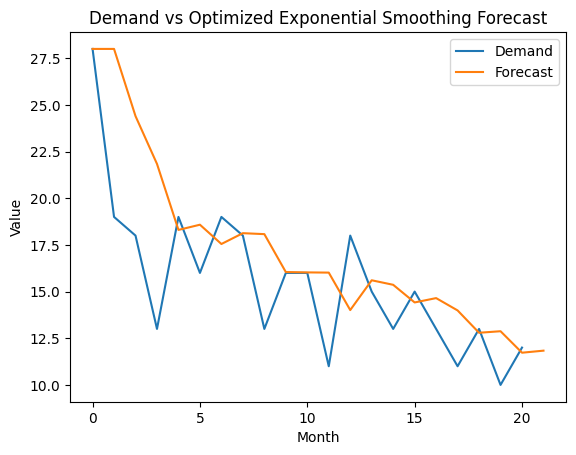

In [15]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Optimized Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.7. Double Exponential Smoothing With Damped Trend

In [16]:
def double_exponential_smoothing_with_damped_trend(
    demand, fcst_period=1, alpha=0.4, beta=0.4, phi=0.9
):
    # Create forecast, level, and trend arrays
    forecast = np.full(len(demand), np.NaN)
    level = np.full(len(demand), np.NaN)
    trend = np.full(len(demand), np.NaN)

    # Update demand, forecast, level, and trend arrays
    demand = np.append(demand, fcst_period * np.NaN)
    forecast = np.append(forecast, fcst_period * np.NaN)
    level = np.append(level, fcst_period * np.NaN)
    trend = np.append(trend, fcst_period * np.NaN)

    # Initiate the first forecast
    level[0] = demand[0]
    trend[0] = demand[1] - demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    # Forecast the rest
    for i in range(2, len(forecast)):
        level[i - 1] = (
            alpha * demand[i - 1] + (1 - alpha) * (level[i - 2] + phi * trend[i - 2])
        )
        trend[i - 1] = beta * (level[i - 1] - level[i - 2]) + (1 - beta) * phi * trend[i - 2]
        forecast[i] = level[i - 1] + trend[i - 1]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast': forecast, 'Error': demand - forecast})
    return df


In [17]:
# KPIs of the forecasting technique
df = double_exponential_smoothing_with_damped_trend(demand, fcst_period=1, alpha=0.4, beta=0.4)
KPI(df)


Forecast KPIs are as below:
Bias value is 1.72
Bias% value is 11.10%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 3.40
MAE% value is 21.88%
MAPE value is 22.19%
MSE value is 22.95
RMSE value is 4.79
RMSE% value is 30.86%


Text(0, 0.5, 'Value')

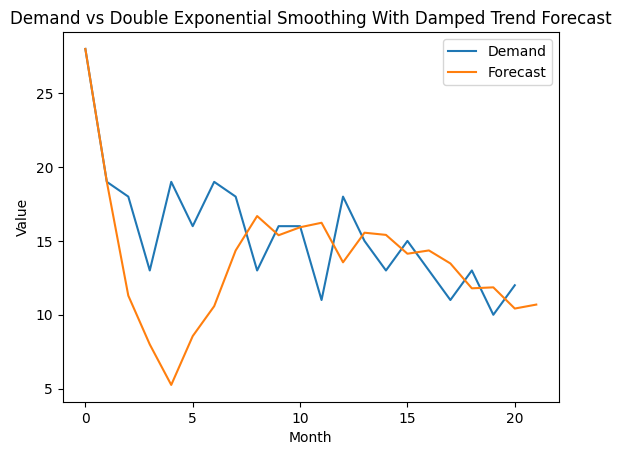

In [18]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Double Exponential Smoothing With Damped Trend Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.8. Triple Exponential Smoothing (Multiplicative) With Damped Trend

In [19]:
def triple_exponential_smoothing_with_damped_trend(
    demand, season_length=12, fcst_period=1, alpha=0.4, beta=0.4, phi=0.9, gamma=0.3
):
    # Create forecast, level, trend, and season arrays
    forecast = np.full(len(demand), np.NaN)
    level = np.full(len(demand), np.NaN)
    trend = np.full(len(demand), np.NaN)
    season = np.full(len(demand), np.NaN)

    # Calculate average monthly demand
    average_monthly_demand = demand[:].sum() / demand.shape[0]

    # Create average each month demand array
    average_each_month_demand = np.full(season_length, np.NaN)

    # Calculate seasonal index for the first cycle
    for i in range(0, season_length):
        average_each_month_demand[i] = demand[i:len(demand):season_length].mean()
        season[i] = average_each_month_demand[i] / average_monthly_demand

    # Update demand, forecast, level, trend, and season arrays
    demand = np.append(demand, fcst_period * np.NaN)
    forecast = np.append(forecast, fcst_period * np.NaN)
    level = np.append(level, fcst_period * np.NaN)
    trend = np.append(trend, fcst_period * np.NaN)
    season = np.append(season, fcst_period * np.NaN)

    # Forecast initiation
    forecast[0] = demand[0]
    level[0] = demand[0] / season[0]
    trend[0] = demand[1] / season[1] - demand[0] / season[0]

    # Forecast for the first cycle
    for i in range(1, season_length):
        forecast[i] = (level[i - 1] + phi * trend[i - 1]) * season[i]
        level[i] = alpha * demand[i] / season[i] + (1 - alpha) * (level[i - 1] + phi * trend[i - 1])
        trend[i] = beta * (level[i] - level[i - 1]) + (1 - beta) * phi * trend[i - 1]

    # Forecast the rest
    for i in range(season_length, len(demand)):
        forecast[i] = (level[i - 1] + phi * trend[i - 1]) * season[i - season_length]
        level[i] = alpha * demand[i] / season[i - season_length] + (1 - alpha) * (level[i - 1] + phi * trend[i - 1])
        trend[i] = beta * (level[i] - level[i - 1]) + (1 - beta) * phi * trend[i - 1]
        season[i] = gamma * demand[i] / level[i] + (1 - gamma) * season[i - season_length]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({"Demand": demand, "Forecast": forecast, "Error": demand - forecast})
    return df


In [20]:
# KPIs of the forecasting technique
df = triple_exponential_smoothing_with_damped_trend(
    demand, season_length=12, fcst_period=1, alpha=0.4, beta=0.4, phi=0.9, gamma=0.3
)
KPI(df)


Forecast KPIs are as below:
Bias value is 0.14
Bias% value is 0.88%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 1.73
MAE% value is 11.14%
MAPE value is 11.38%
MSE value is 4.75
RMSE value is 2.18
RMSE% value is 14.04%


Text(0, 0.5, 'Value')

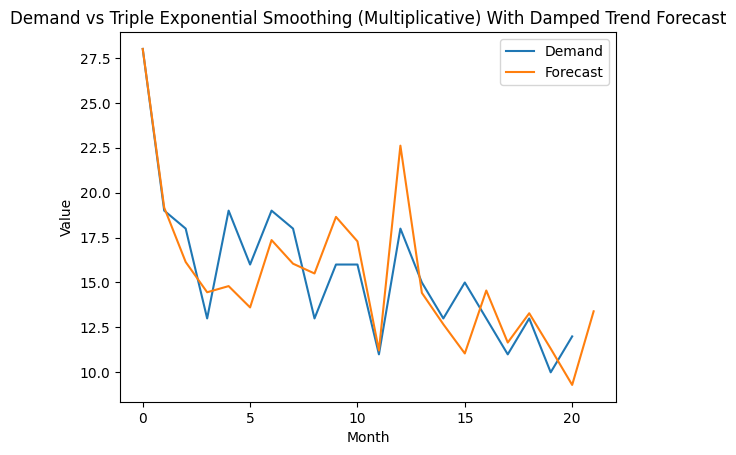

In [21]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Triple Exponential Smoothing (Multiplicative) With Damped Trend Forecast')
plt.xlabel('Month')
plt.ylabel('Value')


## 1.9. Outliers

In [22]:
# Demand array create
demand_outlier = demand

Higher limit: 26
Lower limit: 10
Demand array before cleaning: [28 19 18 13 19 16 19 18 13 16 16 11 18 15 13 15 13 11 13 10 12]
Demand array after cleaning: [26 19 18 13 19 16 19 18 13 16 16 11 18 15 13 15 13 11 13 10 12]


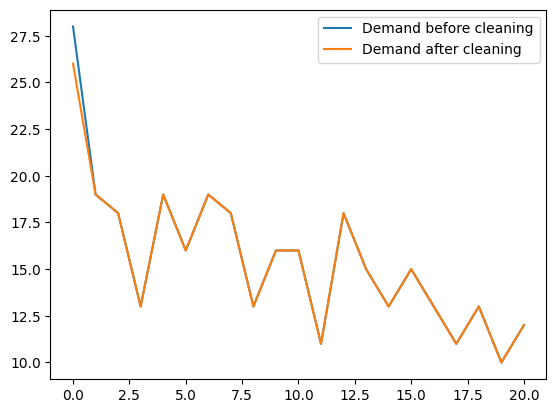

In [23]:
# Winsorization

# Calculate the limits based on percentiles
higher_limit = np.percentile(demand_outlier, 99).astype(int)
lower_limit = np.percentile(demand_outlier, 1).astype(int)

# Print the limits
print(f'''Higher limit: {round(higher_limit, 0)}''')
print(f'''Lower limit: {round(lower_limit, 0)}''')

# Display demand array before cleaning
print(f'''Demand array before cleaning: {demand_outlier}''')

# Apply Winsorization to the demand array
demand_cleaned = np.clip(demand_outlier, lower_limit, higher_limit)

# Display demand array after cleaning
print(f'''Demand array after cleaning: {demand_cleaned}''')

# Visualize the result
plt.plot(demand_outlier)
plt.plot(demand_cleaned)
plt.legend(['Demand before cleaning', 'Demand after cleaning'])


Higher limit: 25
Lower limit: 6
Demand array before cleaning: [28 19 18 13 19 16 19 18 13 16 16 11 18 15 13 15 13 11 13 10 12]
Demand array after cleaning: [25 19 18 13 19 16 19 18 13 16 16 11 18 15 13 15 13 11 13 10 12]


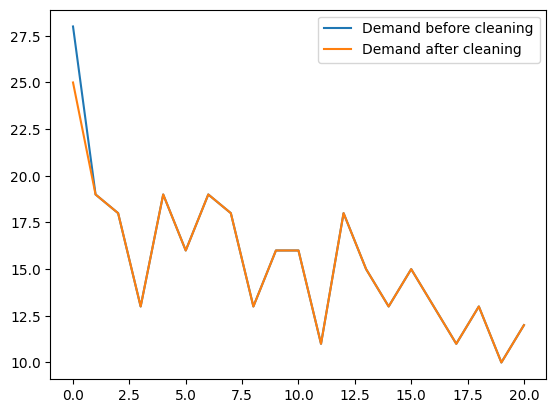

In [24]:
# Standard deviation

# Calculate the mean and standard deviation of the demand array
mean = demand_outlier.mean()
std = demand_outlier.std()

# Calculate the limits (inverse CDF of 99% and 1%) based on normal distribution
from scipy.stats import norm

higher_limit = round(norm.ppf(0.99, mean, std), 0).astype(int)
lower_limit = round(norm.ppf(0.01, mean, std), 0).astype(int)

# Print the cleaning result
print(f'''Higher limit: {higher_limit}''')
print(f'''Lower limit: {lower_limit}''')
print(f'''Demand array before cleaning: {demand_outlier}''')

# Apply the clipping for cleaning
demand_cleaned = np.clip(demand_outlier, lower_limit, higher_limit)

# Print the cleaned demand array
print(f'''Demand array after cleaning: {demand_cleaned}''')

# Visualize the result
plt.plot(demand_outlier)
plt.plot(demand_cleaned)
plt.legend(['Demand before cleaning', 'Demand after cleaning'])


Higher limit for error: 5
Lower limit for error: -5


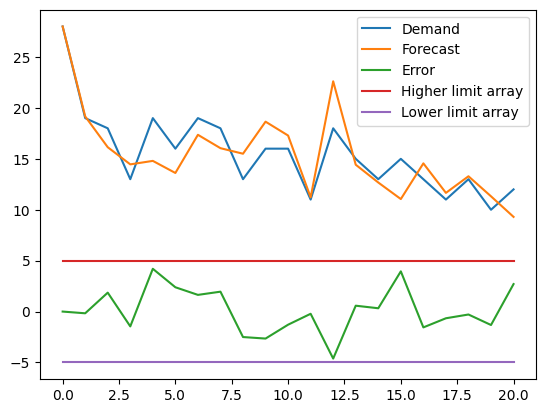

In [25]:
# Error standard deviation

# Get the forecasting result dataframe of Triple Exponential Smoothing (Multiplicative) With Damped Trend
exp_df = df
exp_df = exp_df.iloc[:-1, :]

# Calculate the mean and standard deviation of the error array
mean = exp_df['Error'].mean()
std = exp_df['Error'].std()

# Calculate the limits (inverse CDF of 99% and 1%) based on the normal distribution
from scipy.stats import norm

higher_limit = round(norm.ppf(0.99, mean, std), 0).astype(int)
lower_limit = round(norm.ppf(0.01, mean, std), 0).astype(int)

# Print the cleaning result for error
print(f'''Higher limit for error: {higher_limit}''')
print(f'''Lower limit for error: {lower_limit}''')

# Create arrays for the higher and lower limits
higher_limit_array = np.full(len(exp_df), higher_limit)
lower_limit_array = np.full(len(exp_df), lower_limit)

# Visualize the result
plt.plot(exp_df['Demand'])
plt.plot(exp_df['Forecast'])
plt.plot(exp_df['Error'])
plt.plot(higher_limit_array)
plt.plot(lower_limit_array)
plt.legend(['Demand', 'Forecast', 'Error', 'Higher limit array', 'Lower limit array'])


Updated higher limit for error: 5
Updated lower limit for error: -5


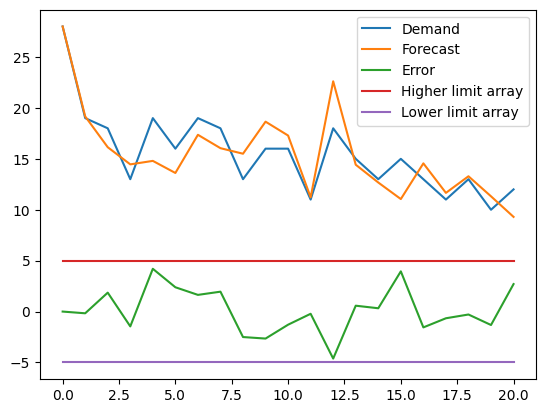

In [26]:
# Recalculate the outliers after removing the previous outliers

# Determine the previous outliers
previous_outliers = (exp_df['Error'] > higher_limit) | (exp_df['Error'] < lower_limit)

# Recalcualte the mean and standard deviation
mean_updated = exp_df.loc[~previous_outliers, 'Error'].mean()
std_updated = exp_df.loc[~previous_outliers, 'Error'].std()

# Calculate the updated limits (inverse CDF of 99% and 1%) based on normal distribution
higher_limit_updated = round(norm.ppf(0.99, mean, std), 0).astype(int)
lower_limit_updated = round(norm.ppf(0.01, mean, std), 0).astype(int)

# Cleaning result
print(f'''Updated higher limit for error: {higher_limit_updated}''')
print(f'''Updated lower limit for error: {lower_limit_updated}''')

# Array for updated higher and lower limits
higher_limit_array_updated = np.full(len(exp_df), higher_limit_updated)
lower_limit_array_updated = np.full(len(exp_df), lower_limit_updated)

# Visualize the result
plt.plot(exp_df['Demand'])
plt.plot(exp_df['Forecast'])
plt.plot(exp_df['Error'])
plt.plot(higher_limit_array_updated)
plt.plot(lower_limit_array_updated)
plt.legend(['Demand', 'Forecast', 'Error', 'Higher limit array', 'Lower limit array'])

## 1.9. Triple Exponential Smoothing (Additive) With Damped Trend

In [27]:
def triple_exponential_smoothing_with_damped_trend_additive(
    demand, season_length=12, fcst_period=1, alpha=0.4, beta=0.4, phi=0.9, gamma=0.3
):
    # Create forecast, level, trend, and season array
    forecast = np.full(len(demand), np.NaN)
    level = np.full(len(demand), np.NaN)
    trend = np.full(len(demand), np.NaN)
    season = np.full(len(demand), np.NaN)

    # Calculate average monthly demand
    average_monthly_demand = (demand[:].sum()) / (demand.shape[0])

    # Create average each month demand array
    average_each_month_demand = np.full(season_length, np.NaN)

    # Calculate seasonal index for first cycle
    for i in range(0, season_length):
        average_each_month_demand[i] = demand[i : len(demand) : season_length].mean()
        season[i] = average_each_month_demand[i] - average_monthly_demand

    # Update demand, forecast, level, and trend array
    demand = np.append(demand, fcst_period * np.NaN)
    forecast = np.append(forecast, fcst_period * np.NaN)
    level = np.append(level, fcst_period * np.NaN)
    trend = np.append(trend, fcst_period * np.NaN)
    season = np.append(season, fcst_period * np.NaN)

    # Forecast initiate
    forecast[0] = demand[0]
    level[0] = demand[0] - season[0]
    trend[0] = (demand[1] - season[1]) - (demand[0] - season[0])

    # Forecast for the first cycle
    for i in range(1, season_length):
        forecast[i] = level[i - 1] + phi * trend[i - 1] + season[i]
        level[i] = alpha * (demand[i] - season[i]) + (1 - alpha) * (level[i - 1] + phi * trend[i - 1])
        trend[i] = beta * (level[i] - level[i - 1]) + (1 - beta) * phi * trend[i - 1]

    # Forecast the rest cycle
    for i in range(season_length, len(demand)):
        forecast[i] = level[i - 1] + phi * trend[i - 1] + season[i - season_length]
        level[i] = alpha * (demand[i] - season[i - season_length]) + (1 - alpha) * (level[i - 1] + phi * trend[i - 1])
        trend[i] = beta * (level[i] - level[i - 1]) + (1 - beta) * phi * trend[i - 1]
        season[i] = gamma * (demand[i] - level[i]) + (1 - gamma) * season[i - season_length]

    # Return the result dataframe
    df = pd.DataFrame.from_dict({"Demand": demand, "Forecast": forecast, "Error": demand - forecast})
    return df


In [28]:
# KPIs of the forecasting technique
df = triple_exponential_smoothing_with_damped_trend_additive(
    demand, season_length=12, fcst_period=1, alpha=0.4, beta=0.4, phi=0.9, gamma=0.3
)
KPI(df)


Forecast KPIs are as below:
Bias value is 0.55
Bias% value is 3.54%
MAD value is 3.02
MAD% value is 19.49%
MAE value is 2.00
MAE% value is 12.88%
MAPE value is 12.87%
MSE value is 6.66
RMSE value is 2.58
RMSE% value is 16.62%


Text(0, 0.5, 'Value')

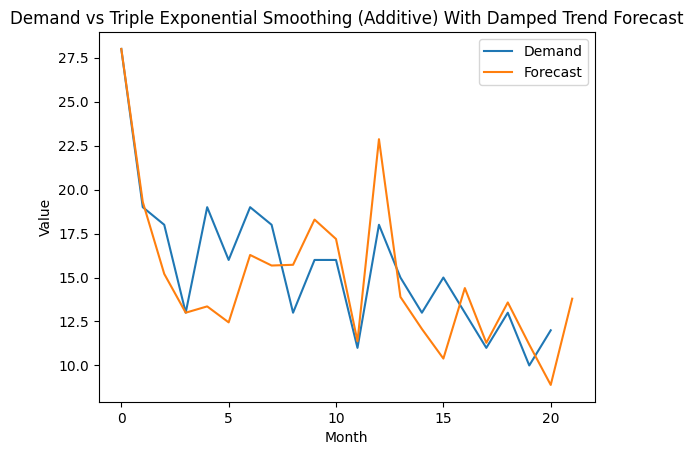

In [29]:
# Visualize the forecasting result
df.index.name = 'Month'
plt.plot(df['Demand'], label='Demand')
plt.plot(df['Forecast'], label='Forecast')
plt.legend()
plt.title('Demand vs Triple Exponential Smoothing (Additive) With Damped Trend Forecast')
plt.xlabel('Month')
plt.ylabel('Value')
